###**TEAM NAME:** DATA SURFERS

---------------------------------------------------------------------------------------------------------------------------------

###**TEAM MEMBERS:**

VEDANT SAHU

YAN TING LIN

CHETANA PRIYA GHANTA

MOKSHESH VORA

---------------------------------------------------------------------------------------------------------------------------------

###**EXECUTIVE SUMMARY:**

Our team's objective is to develop a user-friendly method that enables individuals to search for and select the best dining establishments, such as cafes and restaurants, based on their preferences. Yelp's data helps us classify various food establishments and better understand consumer preferences. This implies that we are able to recommend the ideal location for a person's subsequent meal while taking into account their dining preferences. Our mission is to connect customers/users with their ideal eating experiences by making it simple and customizable to locate a great place to eat.

-------------------------------------------------------------------------------------------------------------------------------

###**DATA SOURCES:**

Our project leverages a comprehensive dataset provided by Yelp, focusing specifically on businesses, reviews, and user interactions within the state of Arizona. The datasets used are as follows:

**Business Dataset:** Contains detailed information about businesses, including their location, attributes, categories, and aggregated star ratings. For our analysis, we applied specific filters to focus on businesses that are currently open, have a star rating greater than 3.5, and are located in Arizona. This allowed us to concentrate on higher-rated establishments that are more likely to contribute meaningful insights into customer satisfaction and preferences.

**Review Dataset:** Comprises user reviews for businesses, including the review text, star rating, and user engagement metrics. The review dataset was merged with the business dataset using the business_id to correlate reviews with specific businesses.

**User Dataset:** Contains information about Yelp users, including their review count, elite status, and average rating given. For our project, we selected only elite users to focus on reviews from highly active and engaged members of the Yelp community, assuming that their feedback might offer deeper insights due to their extensive experience with various businesses.

**Filtering Criteria**

* Business Dataset: Filtered by businesses located in Arizona (state = 'AZ'), which are open (is_open = 1), and have a star rating greater than 3.5.
* Review Dataset: Merged with the business dataset to ensure that only reviews corresponding to the filtered businesses are considered.
* User Dataset: Selected users who are marked as 'elite'.


No external data sources were used

-----------------------------------------------------------------------------------------------------------------------------------

###**SUMMARY STATISTICS**

In [3]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Business dataset**

In [ ]:
# Load the Yelp business dataset
df = pd.read_json('/content/drive/MyDrive/yelp_dataset/yelp_academic_dataset_business.json', lines=True)

In [ ]:
df.isnull().sum()

business_id         0
name                0
address             0
city                0
state               0
postal_code         0
latitude            0
longitude           0
stars               0
review_count        0
is_open             0
attributes      13744
categories        103
hours           23223
dtype: int64

In [ ]:
df_cleaned = df.dropna()

In [ ]:
df_cleaned.isnull().sum()

business_id     0
name            0
address         0
city            0
state           0
postal_code     0
latitude        0
longitude       0
stars           0
review_count    0
is_open         0
attributes      0
categories      0
hours           0
dtype: int64

In [ ]:
filtered_businesses = df_cleaned[(df_cleaned['state'] == 'AZ') & (df_cleaned['city'].notnull()) & (df_cleaned['is_open'] == 1) & (df_cleaned['stars'] >= 3.5)]

In [ ]:
# Display the shape of the filtered dataset
print("Shape of filtered dataset:", filtered_businesses.shape)

Shape of filtered dataset: (4510, 14)


In [ ]:
# Display the first few rows of the filtered dataset
filtered_businesses.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
16,rBmpy_Y1UbBx8ggHlyb7hA,Arizona Truck Outfitters,625 N Stone Ave,Tucson,AZ,85705,32.229872,-110.972342,4.5,10,1,"{'DriveThru': 'False', 'BusinessAcceptsCreditC...","Automotive, Auto Parts & Supplies, Auto Custom...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-17:0', '..."
132,9C2rpb56aQvW0ViZHK9sPw,Home Plate Sports Pub,4880 E 22nd St,Tucson,AZ,85711,32.206315,-110.887843,3.5,56,1,"{'RestaurantsGoodForGroups': 'True', 'Alcohol'...","Bars, Restaurants, Sports Bars, Nightlife","{'Monday': '10:0-2:0', 'Tuesday': '10:0-2:0', ..."
173,E-nhxuu3zbt02oCj_1AFng,Selah,"510 N 7th Ave, Ste 130",Tucson,AZ,85705,32.228092,-110.969804,5.0,60,1,"{'WheelchairAccessible': 'True', 'BikeParking'...","Waxing, Hair Removal, Skin Care, Eyelash Servi...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-18:0', ..."
201,HI4_NqeHMJOnMoVFNxaFyA,1-Hour Auto Glass,"2292 W Magee Rd, Ste 270",Tucson,AZ,85742,32.347511,-111.016561,3.5,21,1,{'BusinessAcceptsCreditCards': 'True'},"Auto Glass Services, Automotive, Windshield In...","{'Monday': '6:0-21:0', 'Tuesday': '6:0-21:0', ..."
208,hdRtVNk-G9Ep4eaHPKXmfA,Carpet One Floor & Home,11005 N Oracle Rd,Oro Valley,AZ,85737,32.405865,-110.949274,4.0,7,1,"{'RestaurantsPriceRange2': '2', 'BikeParking':...","Carpeting, Shopping, Home Services, Flooring, ...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-17:0', '..."


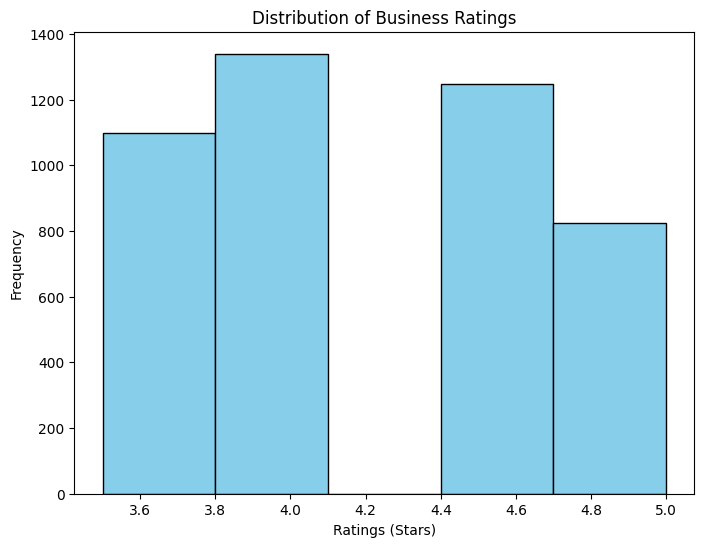

In [ ]:
#Distribution of rating(stars)
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
filtered_businesses['stars'].plot(kind='hist', bins=5, color='skyblue', edgecolor='black')
plt.title('Distribution of Business Ratings')
plt.xlabel('Ratings (Stars)')
plt.ylabel('Frequency')
plt.show()

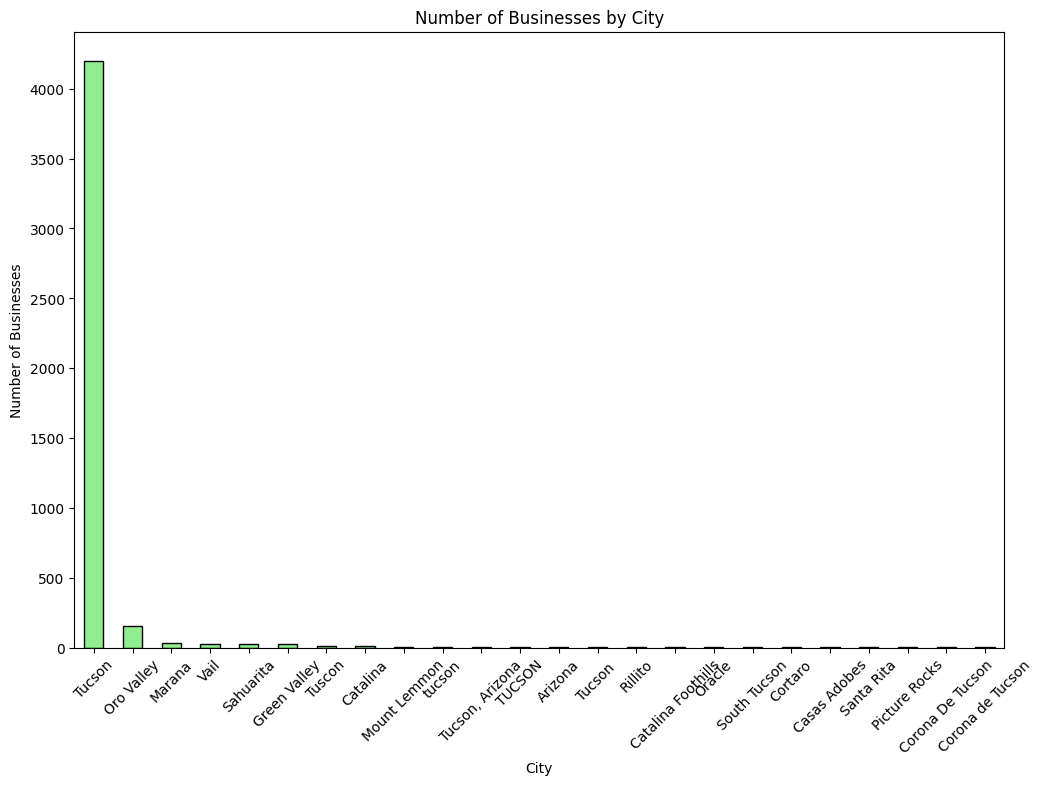

In [ ]:
#Number of Businesses in each city
plt.figure(figsize=(12, 8))
filtered_businesses['city'].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Number of Businesses by City')
plt.xlabel('City')
plt.ylabel('Number of Businesses')
plt.xticks(rotation=45)
plt.show()

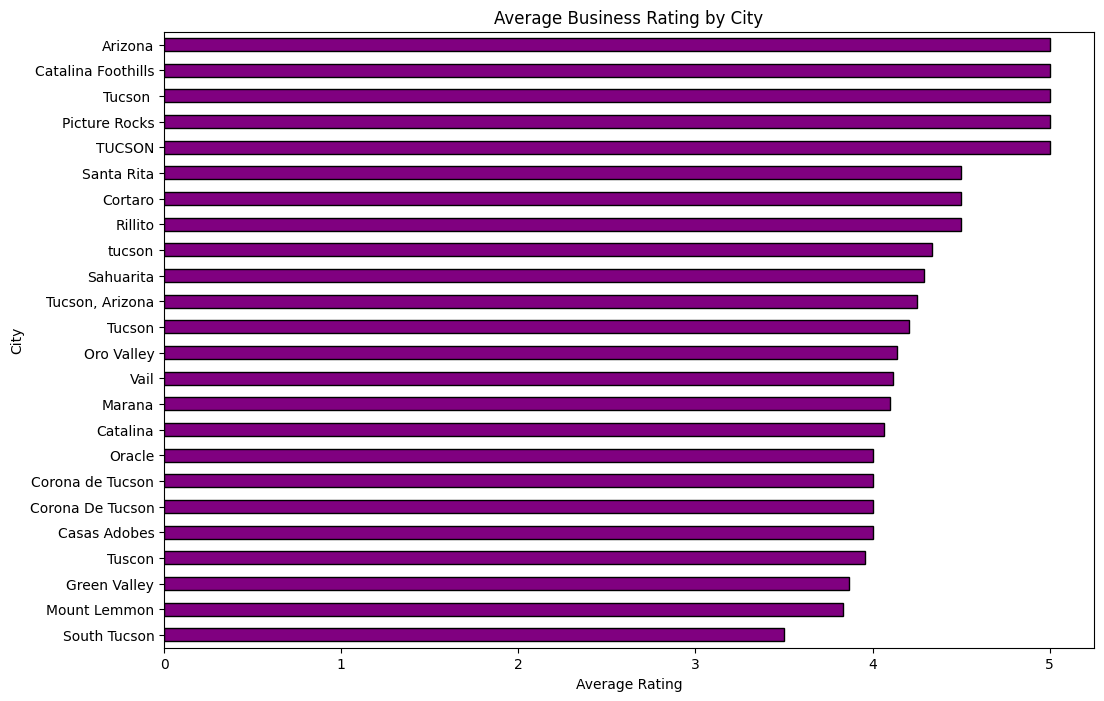

In [ ]:
#Average rating by city
plt.figure(figsize=(12, 8))
filtered_businesses.groupby('city')['stars'].mean().sort_values().plot(kind='barh', color='purple', edgecolor='black')
plt.title('Average Business Rating by City')
plt.xlabel('Average Rating')
plt.ylabel('City')
plt.show()

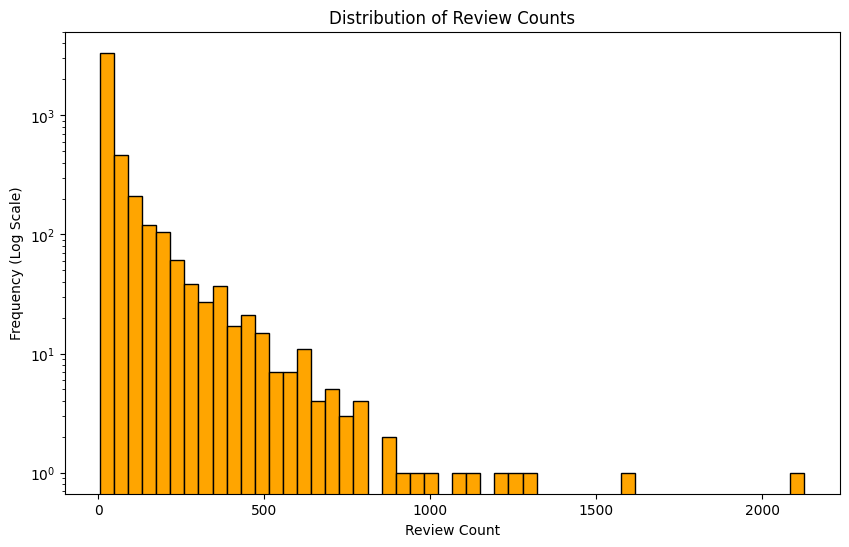

In [ ]:
#Review count distribution
plt.figure(figsize=(10, 6))
filtered_businesses['review_count'].plot(kind='hist', bins=50, color='orange', edgecolor='black', log=True)
plt.title('Distribution of Review Counts')
plt.xlabel('Review Count')
plt.ylabel('Frequency (Log Scale)')
plt.show()

**Reviews dataset**

In [ ]:
# Define the file path to your reviews dataset
reviews_file_path = '/content/drive/MyDrive/yelp_dataset/yelp_academic_dataset_review.json'

In [ ]:
# Specify the chunk size
chunk_size = 10000  # Adjust this based on your available memory

# Create an empty DataFrame to store the concatenated chunks
reviews_chunks = []

# Read the reviews dataset in chunks
for chunk in pd.read_json(reviews_file_path, lines=True, chunksize=chunk_size):
    # Process each chunk if needed
    # For example, you can filter, clean, or perform any other operations on each chunk

    # Append the processed chunk to the list
    reviews_chunks.append(chunk)

In [ ]:
# Concatenate all the chunks into a single DataFrame
reviews_df = pd.concat(reviews_chunks, ignore_index=True)

# Display the shape of the reviews_df
print("Shape of reviews dataset:", reviews_df.shape)


Shape of reviews dataset: (6990280, 9)


In [ ]:
# Merge the filtered_df with the reviews_df based on business_id
merged_df = pd.merge(filtered_businesses, reviews_df, on='business_id', how='inner')

# Display the shape of the merged dataset
print("Shape of merged dataset:", merged_df.shape)

Shape of merged dataset: (268792, 22)


In [ ]:
# Number of reviews
# Total number of reviews for all restaurants
total_reviews_count = merged_df.shape[0]
print("Total number of reviews for all restaurants:", total_reviews_count)

Total number of reviews for all restaurants: 268792


In [ ]:
reviews_df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [ ]:
merged_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,review_count,...,categories,hours,review_id,user_id,stars_y,useful,funny,cool,text,date
0,rBmpy_Y1UbBx8ggHlyb7hA,Arizona Truck Outfitters,625 N Stone Ave,Tucson,AZ,85705,32.229872,-110.972342,4.5,10,...,"Automotive, Auto Parts & Supplies, Auto Custom...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-17:0', '...",wSbZ7KMEIkyFuvEKuHgZ3Q,Grp5mXrdfv49MpoXoraIdg,5,0,0,1,I went in to get shocks for my shell and not o...,2018-02-03 21:57:47
1,rBmpy_Y1UbBx8ggHlyb7hA,Arizona Truck Outfitters,625 N Stone Ave,Tucson,AZ,85705,32.229872,-110.972342,4.5,10,...,"Automotive, Auto Parts & Supplies, Auto Custom...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-17:0', '...",IurtlGAYpuaiZ2NZWNPRBw,ztgVL0NPadoUwCO9MWeUUQ,5,0,0,0,Ive been buying shells from these guys for so ...,2018-08-22 14:12:06
2,rBmpy_Y1UbBx8ggHlyb7hA,Arizona Truck Outfitters,625 N Stone Ave,Tucson,AZ,85705,32.229872,-110.972342,4.5,10,...,"Automotive, Auto Parts & Supplies, Auto Custom...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-17:0', '...",J05oAcf3yoLSLyMeepKM1w,Cbtddaoz25YxlVYyuWxu1Q,5,0,0,0,I've been doing business with them for years. ...,2020-01-15 15:45:31
3,rBmpy_Y1UbBx8ggHlyb7hA,Arizona Truck Outfitters,625 N Stone Ave,Tucson,AZ,85705,32.229872,-110.972342,4.5,10,...,"Automotive, Auto Parts & Supplies, Auto Custom...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-17:0', '...",sW3B6OBuYEYJQhGCjQ2W_w,_f-BxDE6foA4JsG_bMgEmw,5,2,0,1,Great service. Took the time to explain option...,2016-07-08 22:00:27
4,rBmpy_Y1UbBx8ggHlyb7hA,Arizona Truck Outfitters,625 N Stone Ave,Tucson,AZ,85705,32.229872,-110.972342,4.5,10,...,"Automotive, Auto Parts & Supplies, Auto Custom...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-17:0', '...",J__-v5zko4lggrLM-RhyWQ,xC02oHWZnzE-oErT9on5Nw,5,2,0,2,"Have been going here for years, for the great ...",2016-04-09 17:45:53


In [ ]:
merged_df.isnull().sum()

business_id     0
name            0
address         0
city            0
state           0
postal_code     0
latitude        0
longitude       0
stars_x         0
review_count    0
is_open         0
attributes      0
categories      0
hours           0
review_id       0
user_id         0
stars_y         0
useful          0
funny           0
cool            0
text            0
date            0
dtype: int64

In [ ]:
merged_df['categories']

0         Automotive, Auto Parts & Supplies, Auto Custom...
1         Automotive, Auto Parts & Supplies, Auto Custom...
2         Automotive, Auto Parts & Supplies, Auto Custom...
3         Automotive, Auto Parts & Supplies, Auto Custom...
4         Automotive, Auto Parts & Supplies, Auto Custom...
                                ...                        
268787    Specialty Food, Food, Coffee & Tea, Coffee Roa...
268788    Specialty Food, Food, Coffee & Tea, Coffee Roa...
268789    Specialty Food, Food, Coffee & Tea, Coffee Roa...
268790    Specialty Food, Food, Coffee & Tea, Coffee Roa...
268791    Specialty Food, Food, Coffee & Tea, Coffee Roa...
Name: categories, Length: 268792, dtype: object

In [ ]:
keywords = [
    'Restaurants', 'Cafes', 'Diners', 'Bistros', 'Food', 'Bars',
    'Italian', 'Mexican', 'Chinese', 'Japanese', 'Thai', 'Indian',
    'French', 'Vietnamese', 'Greek', 'Lebanese', 'Korean', 'American',
    'Mediterranean', 'Spanish', 'Seafood', 'Sushi', 'Pizza', 'Bakery',
    'Coffee & Tea', 'Specialty Food', 'Ice Cream', 'Fast Food', 'BBQ',
    'Steakhouse', 'Vegan', 'Vegetarian', 'Gluten-Free'
]

# Adjusting the filtering to include a broad spectrum of dining and food-related establishments
restaurants_df_merged = merged_df[merged_df['categories'].str.contains('|'.join(keywords), case=False, na=False)]

In [ ]:
restaurants_df_merged.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,review_count,...,categories,hours,review_id,user_id,stars_y,useful,funny,cool,text,date
10,9C2rpb56aQvW0ViZHK9sPw,Home Plate Sports Pub,4880 E 22nd St,Tucson,AZ,85711,32.206315,-110.887843,3.5,56,...,"Bars, Restaurants, Sports Bars, Nightlife","{'Monday': '10:0-2:0', 'Tuesday': '10:0-2:0', ...",fKlVmrTQ-NdW9ei-b4RLVQ,SOz_xPUPU5TYgOy3yN7GQw,5,0,0,0,Great place to take family!! Day bartender is ...,2017-08-16 17:18:32
11,9C2rpb56aQvW0ViZHK9sPw,Home Plate Sports Pub,4880 E 22nd St,Tucson,AZ,85711,32.206315,-110.887843,3.5,56,...,"Bars, Restaurants, Sports Bars, Nightlife","{'Monday': '10:0-2:0', 'Tuesday': '10:0-2:0', ...",QRAJQOOR8OvMjatVi9YdKg,h_9gTh9rzzJQb61TbB6QFg,2,4,0,0,Ok. I've literally been going here since I was...,2013-10-24 05:46:51
12,9C2rpb56aQvW0ViZHK9sPw,Home Plate Sports Pub,4880 E 22nd St,Tucson,AZ,85711,32.206315,-110.887843,3.5,56,...,"Bars, Restaurants, Sports Bars, Nightlife","{'Monday': '10:0-2:0', 'Tuesday': '10:0-2:0', ...",hMmgqTay8PUzC5QDy8BlvA,vK10miZzAcqqkOAcFKe6uA,5,0,0,0,Finally found a place to hang out with fellow ...,2012-10-09 12:24:46
13,9C2rpb56aQvW0ViZHK9sPw,Home Plate Sports Pub,4880 E 22nd St,Tucson,AZ,85711,32.206315,-110.887843,3.5,56,...,"Bars, Restaurants, Sports Bars, Nightlife","{'Monday': '10:0-2:0', 'Tuesday': '10:0-2:0', ...",xrdrtrul87TfrNb2F2Urpg,bDwBtC0jk3is-qLFlxWGWw,3,1,0,0,"I have nothing bad to say about this place, bu...",2011-07-30 02:21:33
14,9C2rpb56aQvW0ViZHK9sPw,Home Plate Sports Pub,4880 E 22nd St,Tucson,AZ,85711,32.206315,-110.887843,3.5,56,...,"Bars, Restaurants, Sports Bars, Nightlife","{'Monday': '10:0-2:0', 'Tuesday': '10:0-2:0', ...",aEnOY67K5PMV1N3O9oyaow,lYPKJEWvxLcTicC8GWCeXg,4,0,0,0,The reviews are true. All of them. Depending o...,2018-06-19 15:40:54


In [ ]:
restaurants_df_merged.shape

(193028, 22)

<ipython-input-35-b516ef103fca>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  restaurants_df_merged['date'] = pd.to_datetime(restaurants_df_merged['date'])


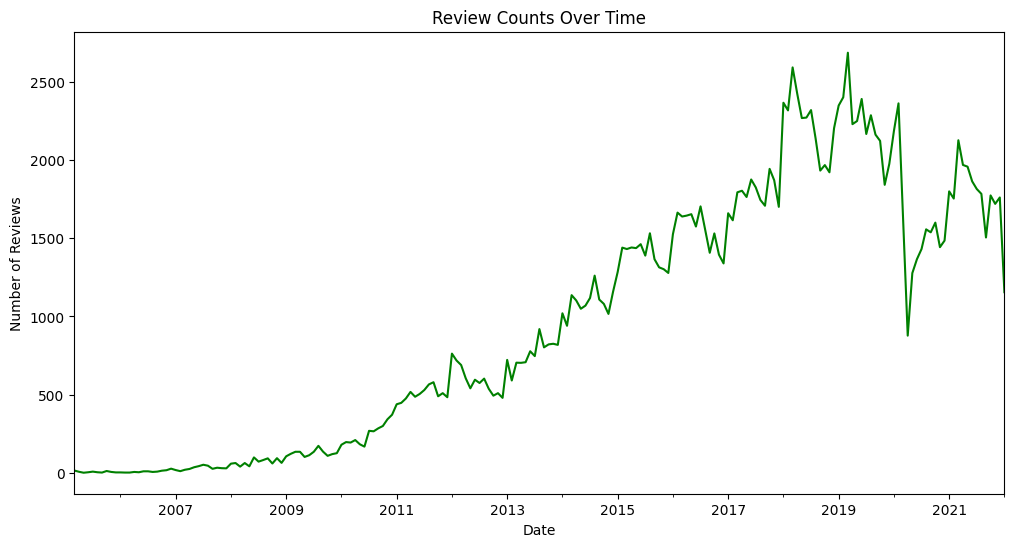

In [ ]:
#review counts over time
# Convert 'date' column to datetime
restaurants_df_merged['date'] = pd.to_datetime(restaurants_df_merged['date'])

plt.figure(figsize=(12, 6))
restaurants_df_merged.set_index('date').resample('M')['review_id'].count().plot(color='green')
plt.title('Review Counts Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.show()

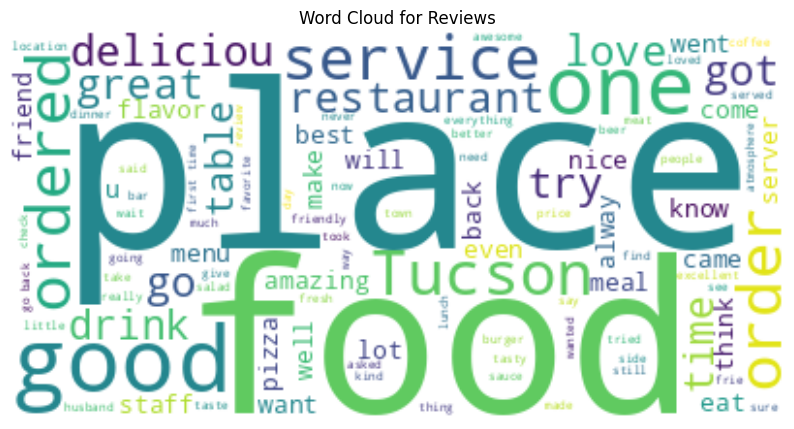

In [ ]:
#word cloud of review text
from wordcloud import WordCloud

# Concatenate all review text into one large string
text = ' '.join(review for review in restaurants_df_merged['text'])

# Generate a word cloud image
wordcloud = WordCloud(background_color='white', max_words=100, contour_width=3, contour_color='steelblue').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove axis to show the word cloud image
plt.title('Word Cloud for Reviews')
plt.show()

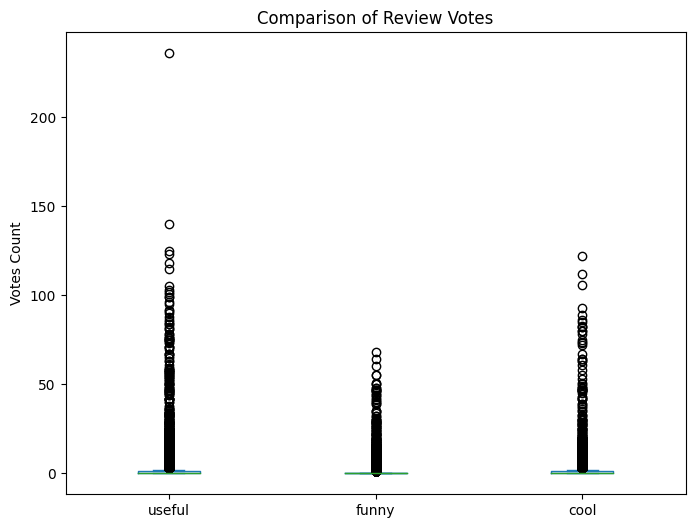

In [ ]:
restaurants_df_merged[['useful', 'funny', 'cool']].plot(kind='box', figsize=(8, 6))
plt.title('Comparison of Review Votes')
plt.ylabel('Votes Count')
plt.show()

**Users dataset(Merged)**

In [ ]:
#elite users
df_elite = pd.read_csv('/content/drive/MyDrive/yelp_dataset/elite_useful10.csv')

In [ ]:
df_elite.shape

(83325, 5)

In [ ]:
users = df_elite.shape[0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**No. of users chosen**

In [ ]:
print(users)

83325


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_elite.head()

,user_id,business_id,stars,useful,text
0,--2vR0DIsmQ6WfcSzKWigw,nk7fI9Vj7L-kKdXOB7cKIw,5,107,Auf unserem Spaziergang durch das historische ...
1,--2vR0DIsmQ6WfcSzKWigw,YiEBSn8VWhnj79igNkShQw,4,112,Auf unserem Rundgang durch das historische Phi...
2,--2vR0DIsmQ6WfcSzKWigw,Mkr1Bm0SFo51L5-swly0bw,5,110,Auf unserem Weg durch die Altstadt von Philade...
3,--2vR0DIsmQ6WfcSzKWigw,YHau-ky1o9hm1jare21Syw,5,99,Im Altstadtviertel von Philadelphia zwischen M...
4,--2vR0DIsmQ6WfcSzKWigw,krCwF4raTYvBcCEwcbA88Q,4,67,Nach einem verunglückten Besuch der Germantown...


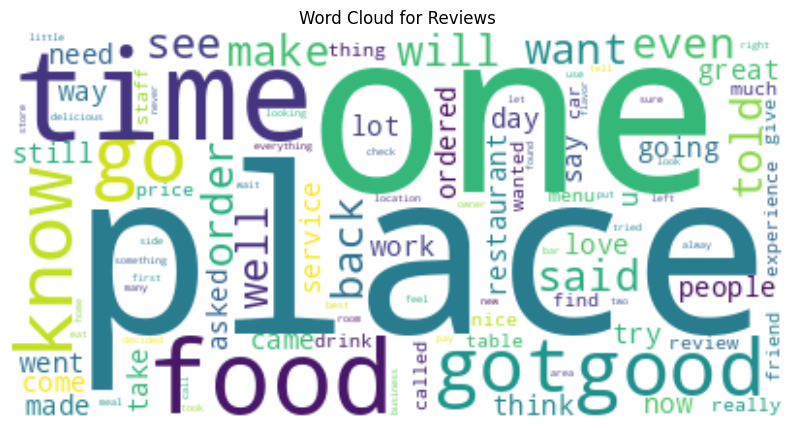

In [ ]:
#word cloud of review text
from wordcloud import WordCloud

# Concatenate all review text into one large string
text = ' '.join(review for review in df_elite['text'])

# Generate a word cloud image
wordcloud = WordCloud(background_color='white', max_words=100, contour_width=3, contour_color='steelblue').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove axis to show the word cloud image
plt.title('Word Cloud for Reviews')
plt.show()

**Average review length**

In [ ]:
average_review_length = df_elite['text'].apply(len).mean()

print(f"The average review length for elite users is: {average_review_length:.2f} characters.")

The average review length for elite users is: 1296.78 characters.


In [ ]:
average_review_length1 = restaurants_df_merged['text'].apply(len).mean()

print(f"The average review length for elite users is: {average_review_length:.2f} characters.")

The average review length for elite users is: 1296.78 characters.


**average stars**

In [ ]:
average_stars = df_elite['stars'].mean()
print(average_stars)

3.3226282628262824


**Number of unique users(elite)**




In [ ]:
number_of_unique_users = df_elite['user_id'].nunique()

print(f"Number of unique users(elite): {number_of_unique_users}")

Number of unique users(elite): 34137


**Tokens**

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
total_tokens = restaurants_df_merged['text'].str.split().map(len).sum()
print(total_tokens)

18254268


In [ ]:
# Flatten the tokenized text into a single list and count unique tokens
unique_words = set(word for sentence in restaurants_df_merged['text'] for word in sentence.split())
number_of_unique_words = len(unique_words)
print(number_of_unique_words)

319112


-----------------------------------------------------------------------------------------------------------------------------

###**DATA EVALUATION:**

**Suitability of Selected Data:**

* The datasets chosen for our project, specifically filtered Yelp business, review, and user data focusing on Arizona's open food establishments with an average rating above 3.5, are highly suited to our business question of developing a personalized restaurant recommendation system.

* The business dataset provides a comprehensive overview of potential dining locations, while the extensive reviews offer insights into customer preferences and experiences.
* The inclusion of elite user data ensures that our analysis benefits from reviews by the most active and engaged Yelp users, offering a depth of data likely to reflect high-quality and reliable feedback.

**Appropriateness of Sample Size:**

* The sample sizes, with 4,510 businesses fitting our initial criteria and over 6.99 million reviews, reduced to 268,792 reviews after merging and further focusing on food places, are substantial for robust data analysis and model training.
* The large volume of reviews ensures a rich dataset for understanding customer sentiments and dining experiences, while the number of businesses offers a wide array of options for recommendations.
* The elite users' dataset, consisting of 83,325 entries, provides a focused perspective from Yelp's most engaged contributors, adding valuable insights to our analysis.

**Potential Biases:**

While our selection criteria aim to ensure relevance and quality, there could be biases inherent in the data:

* Geographic Bias: Focusing solely on Arizona may limit the generalizability of our findings to other regions or demographics.

* Rating Bias: Relying on particular ratings(stars>3.5) might create some bias
* User Bias: Relying heavily on elite user reviews could skew recommendations towards the preferences of a more active but potentially unrepresentative segment of Yelp's user base.

**Data Processing Challenges:**

* Given the size of datasets, it takes ample amount of time to read a run some models
* Text Analysis Complexity: Analyzing the textual data from reviews for topic modeling and sentiment analysis involves complex natural language processing (NLP) techniques, which can be computationally intensive and challenging to optimize for accurate insights.


Overall, while the selected datasets are well-positioned to address our project's goals, careful consideration of potential biases and the complexities of data processing will be crucial to ensuring the success and reliability of our recommendation system.

--------------------------------------------------------------------------------------------------------------------------------

###**PRELIMINARY DATA EXPLORATION:**

**Topic Modeling**

In [ ]:
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
# Initialize regex tokenizer
tokenizer = RegexpTokenizer(r'\w+')

# Vectorize document
cv = CountVectorizer(lowercase=True,
                        stop_words='english',
                        ngram_range = (1,1),
                        tokenizer = tokenizer.tokenize)

# Fit and Transform the documents
train_data = cv.fit_transform(restaurants_df_merged['text'])
train_data

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


<193028x73715 sparse matrix of type '<class 'numpy.int64'>'
	with 7463021 stored elements in Compressed Sparse Row format>

In [ ]:
num_components=20

# Create LDA object
model=LatentDirichletAllocation(n_components=num_components, random_state= 0)

# Fit and Transform SVD model on data
lda_matrix = model.fit_transform(train_data)

# Get Components
lda_components=model.components_

model.score(train_data)

model.perplexity(train_data)

1977.9247898659617

In [ ]:
terms = cv.get_feature_names_out()

for index, component in enumerate(lda_components):
    zipped = zip(terms, component)
    top_terms_key=sorted(zipped, key = lambda t: t[1], reverse=True)[:15]
    top_terms_list=list(dict(top_terms_key).keys())
    print("Topic "+str(index)+": ",top_terms_list)

Topic 0:  ['food', 's', 'mexican', 'tucson', 'restaurant', 'indian', 'good', 'el', 'chicken', 'like', 'authentic', 'buffet', 'place', 've', 't']
Topic 1:  ['t', 'order', 'food', 'time', 's', 'just', 'said', 'didn', 'service', 'don', 'asked', 'like', 'told', 'got', 'place']
Topic 2:  ['coffee', 'breakfast', 's', 'eggs', 'good', 'toast', 'place', 'like', 'bacon', 'little', 'just', 'pancakes', 'shop', 'morning', 'hash']
Topic 3:  ['tea', 'boba', 'sweet', 'milk', 'delicious', 'iced', 'drink', 'flavor', 'fresh', 'refreshing', 'menu', 'flavors', 'green', 'perfect', 'pear']
Topic 4:  ['food', 'great', 'service', 'delicious', 'friendly', 'staff', 'definitely', 'time', 'place', 'amazing', 'wait', 'loved', 'excellent', 'went', 'lunch']
Topic 5:  ['ice', 'cream', 'room', 'hotel', 's', 'night', 'music', 'bar', 'stay', 'tucson', 'nice', 'old', 't', 'pool', 'fun']
Topic 6:  ['great', 'food', 'service', 'place', 'good', 'love', 'friendly', 'staff', 'amazing', 'recommend', 'delicious', 'awesome', 'atm

These topics, derived from restaurant review data through topic modeling, each capture unique aspects of dining experiences, preferences, and offerings. Here's a brief commentary on each identified topic:

1. **Topic 0 - Authentic Cuisines**: Focuses on Mexican and Indian foods, highlighting terms like "authentic," "buffet," and specific items like "chicken," suggesting discussions around traditional and ethnic dining experiences in Tucson.

2. **Topic 1 - Customer Service Concerns**: Involves issues related to ordering and service, with words like "order," "time," "service," "said," "didn't," indicating reviews that discuss service expectations and disappointments.

3. **Topic 2 - Breakfast and Coffee Shops**: Highlights breakfast items and coffee, with mentions of "eggs," "toast," "coffee," "pancakes," suggesting reviews of breakfast spots and cafes.

4. **Topic 3 - Tea and Boba Shops**: Focuses on tea, especially "boba" and "milk tea," along with descriptors like "sweet," "delicious," "refreshing," pointing to reviews of tea shops offering a variety of flavored and specialty teas.

5. **Topic 4 - Positive Dining Experiences**: Emphasizes positive aspects like "great food," "delicious," "friendly staff," "excellent service," suggesting reviews praising the overall dining experience.

6. **Topic 5 - Entertainment and Nightlife**: Merges themes of "ice cream," "music," "hotel," "bar," likely reflecting on venues that offer entertainment or are part of hotel amenities, including mentions of "pool" and "fun."

7. **Topic 6 - Recommendations and Atmosphere**: Contains commendations like "great," "love," "recommend," alongside "friendly," "amazing," focusing on the atmosphere and overall quality of food and service.

8. **Topic 7 - Asian Cuisine**: Concentrates on "sushi," "ramen," "pho," and "rolls," indicating discussions around Asian cuisine, specifically Japanese and Vietnamese dishes.

9. **Topic 8 - Waiting Times and Service**: Discusses aspects related to waiting times and service issues, with mentions of "table," "minutes," "server," highlighting experiences related to service efficiency and seating.

10. **Topic 9 - Mexican Food Specifics**: Focuses on Mexican food staples like "salsa," "chips," "tacos," and "burrito," with a focus on specific dishes and ingredients.

11. **Topic 10 - Bar and Beer Selection**: Centers around "beer," "bar," "selection," indicating reviews of places with a notable selection of beers or bars with a pleasant atmosphere.

12. **Topic 11 - Bar Experience**: Discusses the bar scene more broadly, including "drinks," "bar," "drink," possibly reflecting on the quality of drinks and the general ambiance.

13. **Topic 12 - Casual and Street Food**: Highlights "tacos," "hot dog," "wings," suggesting reviews of casual dining and street food, with a focus on quick and flavorful options.

14. **Topic 13 - Cooking and Dish Quality**: Deals with the quality of food preparation, mentioning "chicken," "fried," "cooked," "dish," focusing on how food is prepared and served.

15. **Topic 14 - Italian Cuisine and Pizza**: Centers on "pizza," "salad," "pasta," reflecting reviews of Italian restaurants and pizzerias, with an emphasis on specific dishes.

16. **Topic 15 - General Food Quality**: Discusses food quality with a broad lens, mentioning "food," "salad," "soup," "meat," focusing on the general taste and satisfaction with meals.

17. **Topic 16 - Desserts and Sweets**: Highlights "chocolate," "cake," "bread," focusing on reviews that discuss dessert options, including gluten-free choices.

18. **Topic 17 - American Classics**: Concentrates on "burger," "fries," "sandwich," indicating reviews of classic American fare and fast food options.

19. **Topic 18 - Local Favorites and Experience**: Mentions "best," "Tucson," "favorite," suggesting reviews that discuss favorite local spots and memorable experiences.

20. **Topic 19 - Dining Atmosphere and Value**: Focuses on the overall dining experience and value for money, with mentions of "service," "happy hour," "menu," reflecting on the quality relative to price and the ambiance of dining establishments.

Each topic encapsulates a distinct aspect of dining experiences, from specific cuisines and dishes to service experiences and the ambiance of establishments, reflecting the diverse interests and concerns of restaurant reviewers.

In [ ]:
!pip install --upgrade pandas==1.5.1
!pip install -q pyLDAvis==3.4.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 17.5 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 1.5.1 which is incompatible.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 5.5 MB/s eta 0:00:00


In [ ]:
import pyLDAvis.lda_model

In [ ]:
pyLDAvis.enable_notebook()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
panel = pyLDAvis.lda_model.prepare(model, train_data, cv, mds='tsne')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pyLDAvis/_prepare.py:244: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [ ]:
panel

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
1      -53.684444  -11.748535       1        1  11.082368
8      -47.535309   34.379807       2        1   8.600919
13     -36.130711   90.450829       3        1   6.303070
18     101.321045  -20.448912       4        1   6.203986
10      16.865450   93.562210       5        1   6.101224
6      -96.996452  -43.209663       6        1   5.985963
19      -2.333099   43.698105       7        1   5.885926
4       72.656036  -63.054806       8        1   5.602691
11      18.276505  -53.631416       9        1   5.588776
9      -88.700584   68.139328      10        1   5.431599
15      45.883793  -14.209978      11        1   4.784638
17     -66.339127  -89.645760      12        1   4.669519
2      -12.941973 -103.079788      13        1   3.899042
14      94.979988   31.293459      14        1   3.601521
16     -29.441833  -51.150597      15        1   3.525750
0       41.536503   31.934628      16        1   2.826564
7     -103.571350   12.583045      17        1   2.747309
5       68.182915   79.513115      18        1   2.744117
12      -3.460886   -5.272034      19        1   2.267854
3       41.104172 -105.459282      20        1   2.147164, topic_info=            Term           Freq          Total Category  logprob  loglift
49400      pizza   26106.000000   26106.000000  Default  30.0000  30.0000
26176       food  133782.000000  133782.000000  Default  29.0000  29.0000
29313      great   90248.000000   90248.000000  Default  28.0000  28.0000
9656   breakfast   16790.000000   16790.000000  Default  27.0000  27.0000
14783     coffee   16909.000000   16909.000000  Default  26.0000  26.0000
...          ...            ...            ...      ...      ...      ...
67240        try     893.989436   31411.348460  Topic20  -5.3437   0.2818
67010      tried     793.329112   15472.459161  Topic20  -5.4632   0.8704
67357     tucson     908.481650   41646.819007  Topic20  -5.3277   0.0158
24803   favorite     776.224845   18510.105792  Topic20  -5.4850   0.6694
28794       good     845.161470  108089.586709  Topic20  -5.3999  -1.0102

[1690 rows x 6 columns], token_table=       Topic      Freq       Term
term                             
80         1  0.191575         10
80         2  0.345197         10
80         3  0.007343         10
80         4  0.063127         10
80         5  0.022886         10
...      ...       ...        ...
73322      4  0.885083         zi
73345      7  0.001180  zinburger
73345     12  0.997447  zinburger
73393     14  0.995076       ziti
73501     20  0.985318          à

[8606 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 9, 14, 19, 11, 7, 20, 5, 12, 10, 16, 18, 3, 15, 17, 1, 8, 6, 13, 4])

-----------------------------------------------------------------------------------------------------------------------------------

###**PROPOSED SOLUTION**



Our proposed solution involves harnessing the power of machine learning (ML) and unstructured data analytics to develop a state-of-the-art recommendation system for food places. The core of our approach will be to employ a combination of techniques tailored to analyze and derive insights from the diverse and rich datasets we've curated, focusing on the following key methodologies:

1. **Customer Segmentation**: We plan to use unsupervised learning algorithms, such as K-means clustering, to segment customers based on their review patterns, preferences, and engagement levels. This segmentation will allow us to identify distinct groups of users with similar tastes and dining behaviors, enabling personalized recommendations.

2. **Natural Language Processing (NLP)**: Given the substantial amount of textual data in reviews, NLP techniques will be pivotal. We will apply topic modeling algorithms, like Latent Dirichlet Allocation (LDA), to uncover prevalent themes and subjects in reviews, providing insights into the aspects customers care about most in their dining experiences. Sentiment analysis will further help us gauge customer sentiments towards specific food places, enriching the data available for making recommendations.

3. **Collaborative Filtering**: To recommend restaurants that a user might like, we'll implement collaborative filtering techniques. By analyzing review patterns across different users and restaurants, we can identify similarities and predict how well a user might rate a restaurant they haven't visited yet. This method will be crucial for tailoring suggestions to individual users based on the collective preferences of similar users.

4. **Content-Based Filtering**: Complementing collaborative filtering, content-based filtering will recommend food places based on the characteristics of restaurants a user has liked in the past. This approach will leverage data on restaurant categories, attributes (e.g., "outdoor seating," "accepts credit cards"), and the topics extracted from reviews to match users with restaurants that fit their preferences.

5. **Hybrid Recommendation System**: Ultimately, we aim to develop a hybrid model that integrates both collaborative and content-based filtering with our customer segmentation and NLP insights. This will allow us to provide highly personalized recommendations that consider both the user's unique preferences and the collective wisdom of similar diners.


In [ ]:
!pip install jupyter
!pip install nbconvert
!jupyter nbconvert --to html '/content/drive/MyDrive/Colab Notebooks/ProjectEDA_DataSurfers.ipynb'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.6 MB/s eta 0:00:00
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/ProjectEDA_DataSurfers.ipynb to html
[NbConvertApp] ERROR | Notebook JSON is invalid: Additional properties are not allowed ('metadata' was unexpected)

Failed validating 'additionalProperties' in stream:

On instance['cells'][66]['outputs'][0]:
{'metadata': {'tags': None},
 'name': 'stdout',
 'output_type': 'stream',
 'text': 'Collecting pandas==1.5.1\n'
         '  Downloading pandas-1.5.1-cp310-cp310-...'}
/usr/local/lib/python3.10/dist-packages/nbconvert/filters/widgetsdatatypefilter.py:71: UserWarning: Your element with mimetype(s) dict_keys(['application/vnd.colab-display-data+json']) is not able to be represented.
  warn(
[NbConvertApp] Writing 2159413 bytes to /content